In [3]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Emission Line Luminosity Functions


In [6]:
name1000='emissionLines_1000_mass3e13_SFR_Mres2-5e7_bpt_z0-1_Gunawardhana2013.hdf5'
# name='emissionLines_4000_mass3e14_SFR_MresScaled2-5e9_bpt_z0-1_Gunawardhana2013_vdis.hdf5'
# name='emissionLines_1000_mass3e13_SFR_MresScaled2-5e9_bpt_z0_Gunawardhana2013_vdisSph_mY0-04.hdf5'
name='emissionLines_1000_mass3e13_SFR_MresScaled2-5e9_bpt_z0_Gunawardhana2013_vdisSph_mY0-04_R0-6_c.hdf5'
# test='emissionLines_4000_test2_recent30.hdf5'
test='/Volumes/LaCie/Research/Carnegie/emissionLines_4000_test4.hdf5'
name_test2='/Users/sachiwee/Research/Carnegie/emissionLines_100_mass3e13_SFR_MresScaled2-5e9_bpt_z0-1_Gunawardhana2013_vdis_testEL_nH100Only.hdf5'
name_varyH='/Users/sachiwee/Research/Carnegie/emissionLines_100_mass3e13_SFR_MresScaled2-5e9_bpt_z0-1_Gunawardhana2013_vdis_testEL_extremeRatios_varynH.hdf5'

In [7]:
file=h5py.File(test,'r')
list(file['Outputs']['Output1']['nodeData'].keys())

['basicMass',
 'basicTimeLastIsolated',
 'blackHoleMass',
 'blackHoleSpin',
 'darkMatterProfileScale',
 'diskAbundancesGasMetals',
 'diskAbundancesGasO',
 'diskAbundancesStellarMetals',
 'diskAbundancesStellarO',
 'diskAngularMomentum',
 'diskLuminositiesStellar:HeliumContinuum:rest:z0.0500',
 'diskLuminositiesStellar:Lyc:rest:z0.0500',
 'diskLuminositiesStellar:OxygenContinuum:rest:z0.0500',
 'diskMassGas',
 'diskMassStellar',
 'diskRadius',
 'diskStarFormationHistoryMass',
 'diskStarFormationRate',
 'diskVelocity',
 'hotHaloAbundancesMetals',
 'hotHaloAbundancesO',
 'hotHaloAngularMomentum',
 'hotHaloChemicalsAtomicHydrogen',
 'hotHaloChemicalsAtomicHydrogenCation',
 'hotHaloChemicalsElectron',
 'hotHaloChemicalsMolecularHydrogen',
 'hotHaloMass',
 'hotHaloOuterRadius',
 'hotHaloOutflowedAbundancesMetals',
 'hotHaloOutflowedAbundancesO',
 'hotHaloOutflowedAngularMomentum',
 'hotHaloOutflowedChemicalsAtomicHydrogen',
 'hotHaloOutflowedChemicalsAtomicHydrogenCation',
 'hotHaloOutflowed

In [27]:

stellarPopulation = file['Parameters/stellarPopulation']
recycledFraction  = stellarPopulation.attrs['recycledFraction']
stellar_mass=file['Outputs']['Output1']['nodeData']['spheroidMassStellar'][:]+file['Outputs']['Output1']['nodeData']['diskMassStellar'][:]

stellar_mass=stellar_mass/(1-recycledFraction)
#merger tree weight
w=file['Outputs']['Output1']['nodeData']['mergerTreeWeight'][:]

#Halpha Luminosity in ergs/s
# Lalpha_old=file['Outputs']['Output1']['nodeData']['luminosityEmissionLine:balmerAlpha6565'][:]
Lalpha=file['Outputs']['Output1']['nodeData']['luminosityEmissionLineDisk:balmerAlpha6565'][:]+file['Outputs']['Output1']['nodeData']['luminosityEmissionLineSpheroid:balmerAlpha6565'][:]
# Lalpha_sph=
Lbeta=file['Outputs']['Output1']['nodeData']['luminosityEmissionLineDisk:balmerBeta4863'][:]+file['Outputs']['Output1']['nodeData']['luminosityEmissionLineSpheroid:balmerBeta4863'][:]
Qh=file['Outputs']['Output1']['nodeData']['diskLuminositiesStellar:Lyc:rest:z0.0500'][:]+file['Outputs']['Output1']['nodeData']['spheroidLuminositiesStellar:Lyc:rest:z0.0500'][:]
L_AB = 4.46592
h=6.626e-34
λmin=10
λmax=911.862
Qh=Qh*(L_AB / h) * np.log(λmax/λmin)
# LNII=file['Outputs']['Output1']['nodeData']['luminosityEmissionLine:nitrogenII6585'][:]
LNII=file['Outputs']['Output1']['nodeData']['luminosityEmissionLineDisk:nitrogenII6550'][:]+file['Outputs']['Output1']['nodeData']['luminosityEmissionLineSpheroid:nitrogenII6550'][:]
LNII=LNII+file['Outputs']['Output1']['nodeData']['luminosityEmissionLineDisk:nitrogenII6585'][:]+file['Outputs']['Output1']['nodeData']['luminosityEmissionLineSpheroid:nitrogenII6585'][:]
LOII=file['Outputs']['Output1']['nodeData']['luminosityEmissionLineDisk:oxygenII3727'][:]+file['Outputs']['Output1']['nodeData']['luminosityEmissionLineSpheroid:oxygenII3727'][:]
LOII=LOII+file['Outputs']['Output1']['nodeData']['luminosityEmissionLineDisk:oxygenII3730'][:]+file['Outputs']['Output1']['nodeData']['luminosityEmissionLineSpheroid:oxygenII3730'][:]

In [28]:
print(Lalpha)
print(LOII)
# print(Lalpha_sph[Lalpha_sph>0])

[9.68259463e+35 4.44324490e+35 3.81585676e+35 ... 3.78468858e+37
 3.30580895e+37 3.92198721e+37]
[1.85268323e+36 9.66680430e+35 7.24146060e+35 ... 4.70701354e+37
            nan 4.27896167e+37]


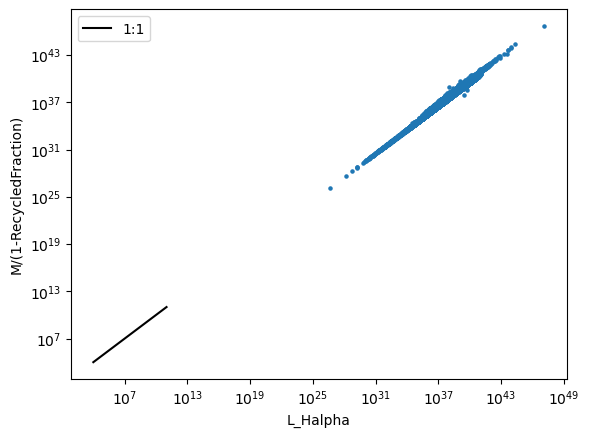

In [29]:
plt.plot([1e4,1e11],[1e4,1e11],c='k',label='1:1')
plt.scatter(Lalpha,Lbeta,s=5)
plt.xlabel('L_Halpha')
plt.ylabel('M/(1-RecycledFraction)')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [30]:
print((L_AB / h) * np.log(λmax/λmin))

3.041694281712376e+34


In [31]:
list(file['Outputs']['Output1']['nodeData'].keys())
# print(x)

['basicMass',
 'basicTimeLastIsolated',
 'blackHoleMass',
 'blackHoleSpin',
 'darkMatterProfileScale',
 'diskAbundancesGasMetals',
 'diskAbundancesGasO',
 'diskAbundancesStellarMetals',
 'diskAbundancesStellarO',
 'diskAngularMomentum',
 'diskLuminositiesStellar:HeliumContinuum:rest:z0.0500',
 'diskLuminositiesStellar:Lyc:rest:z0.0500',
 'diskLuminositiesStellar:OxygenContinuum:rest:z0.0500',
 'diskMassGas',
 'diskMassStellar',
 'diskRadius',
 'diskStarFormationHistoryMass',
 'diskStarFormationRate',
 'diskVelocity',
 'hotHaloAbundancesMetals',
 'hotHaloAbundancesO',
 'hotHaloAngularMomentum',
 'hotHaloChemicalsAtomicHydrogen',
 'hotHaloChemicalsAtomicHydrogenCation',
 'hotHaloChemicalsElectron',
 'hotHaloChemicalsMolecularHydrogen',
 'hotHaloMass',
 'hotHaloOuterRadius',
 'hotHaloOutflowedAbundancesMetals',
 'hotHaloOutflowedAbundancesO',
 'hotHaloOutflowedAngularMomentum',
 'hotHaloOutflowedChemicalsAtomicHydrogen',
 'hotHaloOutflowedChemicalsAtomicHydrogenCation',
 'hotHaloOutflowed

In [32]:
print(file['Outputs']['Output1']['nodeData']['diskLuminositiesStellar:OxygenContinuum:rest:z0.0500'][:])

[ 0.24723507  0.10733723  0.08973841 ... 11.223066   10.80799192
 11.94542775]


[6.32107628e+34 2.58834546e+34 2.34941392e+34 ... 2.77265332e+36
 2.64033427e+36 2.95104972e+36]


/var/folders/8_/c96bc5xx7ps75wmdbb1vl_z40000gn/T/ipykernel_31675/1802966498.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(Qh,Lalpha/Qh,s=3,c='k')


Text(0, 0.5, 'Lalpha/Q_H')

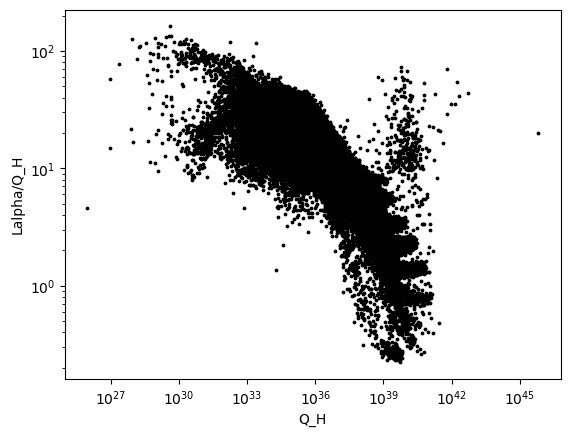

In [33]:
print(Qh)
plt.scatter(Qh,Lalpha/Qh,s=3,c='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Q_H')
plt.ylabel('Lalpha/Q_H')

In [34]:
file['Outputs']['Output1'].keys()

<KeysViewHDF5 ['mergerTreeCount', 'mergerTreeIndex', 'mergerTreeStartIndex', 'mergerTreeWeight', 'nodeData']>

In [35]:
list(file['Outputs']['Output1']['nodeData'].keys())

['basicMass',
 'basicTimeLastIsolated',
 'blackHoleMass',
 'blackHoleSpin',
 'darkMatterProfileScale',
 'diskAbundancesGasMetals',
 'diskAbundancesGasO',
 'diskAbundancesStellarMetals',
 'diskAbundancesStellarO',
 'diskAngularMomentum',
 'diskLuminositiesStellar:HeliumContinuum:rest:z0.0500',
 'diskLuminositiesStellar:Lyc:rest:z0.0500',
 'diskLuminositiesStellar:OxygenContinuum:rest:z0.0500',
 'diskMassGas',
 'diskMassStellar',
 'diskRadius',
 'diskStarFormationHistoryMass',
 'diskStarFormationRate',
 'diskVelocity',
 'hotHaloAbundancesMetals',
 'hotHaloAbundancesO',
 'hotHaloAngularMomentum',
 'hotHaloChemicalsAtomicHydrogen',
 'hotHaloChemicalsAtomicHydrogenCation',
 'hotHaloChemicalsElectron',
 'hotHaloChemicalsMolecularHydrogen',
 'hotHaloMass',
 'hotHaloOuterRadius',
 'hotHaloOutflowedAbundancesMetals',
 'hotHaloOutflowedAbundancesO',
 'hotHaloOutflowedAngularMomentum',
 'hotHaloOutflowedChemicalsAtomicHydrogen',
 'hotHaloOutflowedChemicalsAtomicHydrogenCation',
 'hotHaloOutflowed

In [36]:
#observations
data_alpha=np.genfromtxt('Halpha_obs.txt',names=True)
data_NII=np.genfromtxt('NII_obs.txt',names=True)
data_OII=np.genfromtxt('OII_obs.txt',names=True)
def Lobs(L,logPhiStar,logLstar,alpha,sigma):
    '''Observed luminosity function fit following Saunders+1990 '''
    PhiStar=10**logPhiStar
    Lstar=10**logLstar
    term1=PhiStar*(L/Lstar)**alpha
    term2=(np.log10(1+(L/Lstar))/(np.sqrt(2)*sigma))**2.0
    term3=np.exp(-term2)
    
    Phi_L=term1*term3
    return Phi_L
Lobs=np.vectorize(Lobs)

In [37]:
# print(data_alpha['Lalpha'])
# Nobs_alpha=(10**np.array(data_alpha['SF_sSFR']))+(10**np.array(data_alpha['SF_BPT_WHAN']))+(10**np.array(data_alpha['Composite'])+(10**np.array(data_alpha['Passive'])))
Ldata=10**np.array(data_alpha['Lalpha'])
Nobs_alpha=np.zeros(len(Ldata))
Nobs_alpha1=np.zeros(len(Ldata))
alpha_err=np.zeros(len(Ldata))
for i in range(len(Ldata)):
    array=[]
    array1=[]
    array.append(data_alpha['SF_sSFR'][i])
    array.append(data_alpha['SF_BPT_WHAN'][i])
    array.append(data_alpha['Composite'][i])
    array.append(data_alpha['Passive'][i])
    
    array1.append(data_alpha['SF_sSFR'][i])
    array1.append(data_alpha['SF_BPT_WHAN'][i])
    array1.append(data_alpha['Passive'][i])
    
    array_err=[]
    array_err.append(data_alpha['SF_sSFR_err'][i])
    array_err.append(data_alpha['SF_BPT_WHAN_err'][i])
    array_err.append(data_alpha['Composite_err'][i])
    array_err.append(data_alpha['Passive_err'][i])

    mask=array!=999
    mask1=array1!=999
    
    Nobs_alpha[i]=np.sum(10**array[mask])
    Nobs_alpha1[i]=np.sum(10**array1[mask1])
    
    alpha_err[i]=np.linalg.norm((10**array[mask])*array_err[mask])



In [38]:


Nobs_nii=np.zeros(len(Ldata))
Nobs_nii1=np.zeros(len(Ldata))
nii_err=np.zeros(len(Ldata))

for i in range(len(Ldata)):
    array=[]
    array1=[]
    array_err=[]
    array.append(data_NII['SF_sSFR'][i])
    array.append(data_NII['SF_BPT_WHAN'][i])
    array.append(data_NII['Composite'][i])
    array.append(data_NII['Passive'][i])
    
    array1.append(data_NII['SF_sSFR'][i])
    array1.append(data_NII['SF_BPT_WHAN'][i])
    array1.append(data_NII['Passive'][i])
    
    
    array_err.append(data_NII['SF_sSFR_err'][i])
    array_err.append(data_NII['SF_BPT_WHAN_err'][i])
    array_err.append(data_NII['Composite_err'][i])
    array_err.append(data_NII['Passive_err'][i])
# print(array)
    mask=array!=999
    mask1=array1!=999
    
    Nobs_nii[i]=np.sum(10**array[mask])
    Nobs_nii1[i]=np.sum(10**array1[mask1])
    nii_err[i]=np.linalg.norm(array_err[mask])
    print(nii_err[i])


# print(Nobs_nii)
print(nii_err)

0.094
0.021
0.024
0.016
0.025
0.011
0.022
0.013
0.015
0.005
0.013
0.013
0.014
0.003
0.042
0.048
0.128
0.204
999.0
[9.40e-02 2.10e-02 2.40e-02 1.60e-02 2.50e-02 1.10e-02 2.20e-02 1.30e-02
 1.50e-02 5.00e-03 1.30e-02 1.30e-02 1.40e-02 3.00e-03 4.20e-02 4.80e-02
 1.28e-01 2.04e-01 9.99e+02]


/var/folders/8_/c96bc5xx7ps75wmdbb1vl_z40000gn/T/ipykernel_31675/2823645104.py:27: RuntimeWarning: overflow encountered in double_scalars
  Nobs_nii[i]=np.sum(10**array[mask])
/var/folders/8_/c96bc5xx7ps75wmdbb1vl_z40000gn/T/ipykernel_31675/2823645104.py:28: RuntimeWarning: overflow encountered in double_scalars
  Nobs_nii1[i]=np.sum(10**array1[mask1])


In [39]:

Nobs_oii=np.zeros(len(Ldata))
Nobs_oii1=np.zeros(len(Ldata))
oii_err=np.zeros(len(Ldata))

for i in range(len(Ldata)):
    array=[]
    array1=[]
    array_err=[]
    array.append(data_OII['SF_sSFR'][i])
    array.append(data_OII['SF_BPT_WHAN'][i])
    array.append(data_OII['Composite'][i])
    array.append(data_OII['Passive'][i])
    
    array1.append(data_OII['SF_sSFR'][i])
    array1.append(data_OII['SF_BPT_WHAN'][i])
    array1.append(data_OII['Passive'][i])
    
    array_err.append(data_OII['SF_sSFR_err'][i])
    array_err.append(data_OII['SF_BPT_WHAN_err'][i])
    array_err.append(data_OII['Composite_err'][i])
    array_err.append(data_OII['Passive_err'][i])
# print(array)
    mask=array!=999
    mask1=array1!=999
    
    Nobs_oii[i]=np.sum(10**array[mask])
    Nobs_oii1[i]=np.sum(10**array1[mask1])
    oii_err[i]=np.linalg.norm((10**array[mask])*array_err[mask])
    print(oii_err[i])
#     print(array_err[mask])
    


0.00015539176283950384
5.2032237882578543e-05
2.48452007059831e-05
4.2340267836135755e-05
4.1780472578334805e-05
2.1640759823113434e-05
1.7997794749837756e-05
8.319385694368665e-06
4.110960958218893e-06
4.852214693981943e-06
1.4966768309117209e-06
1.6067192932925487e-06
5.19125670562789e-07
3.025017114042147e-07
4.585552705361072e-07
1.224263370254404e-07
1.443719919261016e-07
1.6151439750823638e-08
9.797033716820029e-09


In [40]:
print(len(Lalpha))
print(len(LNII))
# print(Nobs_alpha)

193720
193720


In [41]:

Lvals=np.logspace(40,44,50)

print(np.log10(bins[1])-np.log10(bins[0]),np.log10(bins[2])-np.log10(bins[1]))

0.13793103448276156 0.13793103448275446


In [42]:
Lobserved= Lobs(Lvals,logphi[i][1],logLs[i][1],alph[i][1],sig[i][1])+ Lobs(Lvals,logphi[i][2],logLs[i][2],alph[i][2],sig[i][2])+ Lobs(Lvals,logphi[i][4],logLs[i][4],alph[i][4],sig[i][4])+Lobs(Lvals,logphi[i][6],logLs[i][6],alph[i][6],sig[i][6])

IndexError: index 18 is out of bounds for axis 0 with size 3

/var/folders/8_/c96bc5xx7ps75wmdbb1vl_z40000gn/T/ipykernel_31675/2428089707.py:9: RuntimeWarning: invalid value encountered in double_scalars
  term1=PhiStar*(L/Lstar)**alpha
/var/folders/8_/c96bc5xx7ps75wmdbb1vl_z40000gn/T/ipykernel_31675/2428089707.py:10: RuntimeWarning: invalid value encountered in log10
  term2=(np.log10(1+(L/Lstar))/(np.sqrt(2)*sigma))**2.0


23


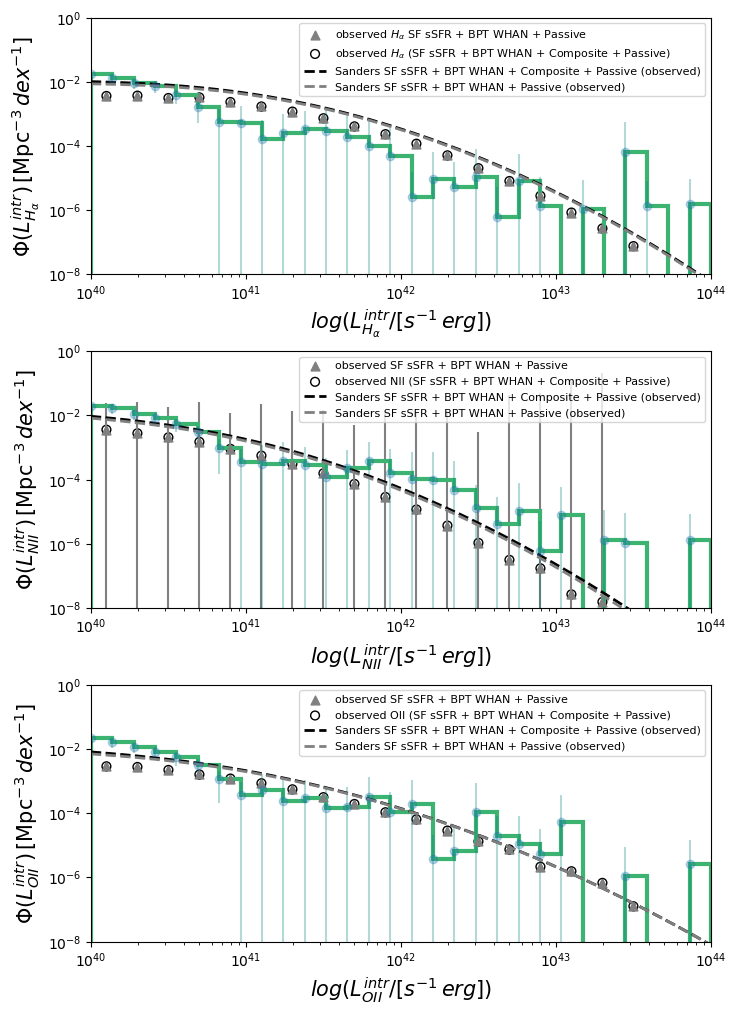

In [44]:

fig, ax = plt.subplots(3, 1)
plt.subplots_adjust(hspace=.3)
fig.set_figheight(12)
fig.set_figwidth(8)

labels=['Full sample','SF sSFR','SF BPT WHAN', 'LINERs', 'Composite', 'Seyferts', 'Passive']

#observed
# logphi=np.array([[-2.24,-2.34,-2.49,-3.52,-2.95,-4.06,-8.05],[-2.2,-2.29,-2.44,-3.17,-2.9,-3.92,-5.51],[-2.25,-2.37,-2.49,-3.47,-2.93,-3.86,-5.32]])
# logLs=np.array([[40.00,40.00,40.00,40.49,40.0,40.0,41.49],[40.0,40.0,40.05,40,40,40.38,40],[40,40,40,40.44,40,40,40]])
# alph=np.array([[-0.06,0.12,0.21,-0.76,-0.21,0.30,-0.84],[-0,-0.3,-0.3,-0.31,-0.61,-0.37,-0.15,-1],[-0.33,-0.26,-0.21,-0.68,-0.54,-0.05,-0.18]])
# sig=np.array([[-0.66,0.65,-0.64,0.41,-0.72,-0.64,-0.29],[-0.74,-0.73,-0.69,-0.79,-0.76,-0.7,-0.56],[0.85,-0.83,-0.83,0.66,0.78,0.74,-0.40]])

#observed
logphi=np.array([[-2.24,-2.29,-2.41,-3.21,-2.80,-4.05,-5.77],[-2.2,-2.29,-2.44,-3.17,-2.9,-3.92,-5.51],[-2.25,-2.37,-2.49,-3.47,-2.93,-3.86,-5.32]])
logLs=np.array([[40.29,40.18,40.07,40.0,40.0,40.81,40.03],[40.0,40.0,40.05,40,40,40.38,40],[40,40,40,40.44,40,40,40]])
alph=np.array([[-0.19,-0.04,0.07,-0.65,-0.27,-0.20,-1.71],[-0.35,-0.3,-0.31,-0.61,-0.37,-0.15,-1],[-0.33,-0.26,-0.21,-0.68,-0.54,-0.05,-0.18]])
sig=np.array([[0.73,0.72,0.72,0.77,0.8,0.59,-7.99],[-0.74,-0.73,-0.69,-0.79,-0.76,-0.7,-0.56],[0.85,-0.83,-0.83,0.66,0.78,0.74,-0.40]])




Lo=Lobs(Lvals,-2.29,40,-0.3,-0.73)
col=['k','purple','dodgerblue','brown','gold','navy','r']
lines=['-','--','--','-.','--',':',':']
bins=np.logspace(40,44,30)
dlogL=np.log10(bins[1])-np.log10(bins[0])
# print(w1)

ax[0].scatter(Ldata,Nobs_alpha,s=40,c='grey',marker='^',label=r'observed $H_{\alpha}$ SF sSFR + BPT WHAN + Passive')
ax[0].errorbar(Ldata,Nobs_alpha,yerr=alpha_err,c='grey',fmt='^')

ax[1].errorbar(Ldata,Nobs_nii,yerr=nii_err,c='grey',fmt='^')
ax[1].scatter(Ldata,Nobs_nii,s=40,c='grey',marker='^',label=r'observed SF sSFR + BPT WHAN + Passive')
ax[2].scatter(Ldata,Nobs_oii,s=40,c='grey',marker='^',label=r'observed SF sSFR + BPT WHAN + Passive')

ax[0].scatter(Ldata,Nobs_alpha1,s=40,edgecolors='k',facecolors='none',marker='o',label=r'observed $H_{\alpha}$ (SF sSFR + BPT WHAN + Composite + Passive)')
# ax[2].errorbar(Ldata,Nobs_nii,yerr=.02,c='grey',fmt='^')
ax[1].scatter(Ldata,Nobs_nii1,s=40,edgecolors='k',facecolors='none',marker='o',label=r'observed NII (SF sSFR + BPT WHAN + Composite + Passive)')
ax[2].scatter(Ldata,Nobs_oii1,s=40,edgecolors='k',facecolors='none',marker='o',label=r'observed OII (SF sSFR + BPT WHAN + Composite + Passive)')
ax[2].errorbar(Ldata,Nobs_oii,yerr=oii_err,c='grey',fmt='^')





bins = np.logspace(40, 44, 30)

model_L=[Lalpha,LNII,LOII]

for i in range(3):
    # First histogram with weights w
    hist, _ = np.histogram(model_L[i], bins=bins, weights=w / dlogL)


    # Second histogram with weights w^2
    hist_squared, _ = np.histogram(model_L[i], bins=bins, weights=w*w / (dlogL*dlogL))

    # Take the square root of the second histogram
    errors = np.sqrt(hist_squared)

    # Calculate bin widths
    bin_widths = np.diff(np.log10(bins))

    # Normalize by bin width
    normalized_errors = errors / bin_widths


    ax[i].hist(model_L[i], bins=bins, histtype='step', weights=w / dlogL, color='mediumseagreen', linewidth=3,log=True)
    ax[i].errorbar(bins[:-1], hist, yerr=normalized_errors, fmt='o', ecolor='teal', alpha=0.3)

####################################################################################################
# ax[0].errorbar(bins[:,-1][4],hist[4],yerr=normalized_errors[4],fmt='o', ecolor='b', alpha=0.5)
# print(bins[:-1][hist>0][18],hist[hist>0][18],normalized_errors[hist>0][18])
# print(hist-normalized_errors)
# ax[1].hist(LNII,np.logspace(40,44,50),histtype='step',weights=w/dlogL,color='mediumseagreen',linewidth=3)
# ax[2].hist(LOII,np.logspace(40,44,50),histtype='step',weights=w/dlogL,color='mediumseagreen',linewidth=3)
for i in range(3):
    Lobserved= Lobs(Lvals,logphi[i][1],logLs[i][1],alph[i][1],sig[i][1])+Lobs(Lvals,logphi[i][2],logLs[i][2],alph[i][2],sig[i][2])+Lobs(Lvals,logphi[i][4],logLs[i][4],alph[i][4],sig[i][4])+ Lobs(Lvals,logphi[i][6],logLs[i][6],alph[i][6],sig[i][6])
    Lobserved1= Lobs(Lvals,logphi[i][1],logLs[i][1],alph[i][1],sig[i][1])+Lobs(Lvals,logphi[i][2],logLs[i][2],alph[i][2],sig[i][2])+ Lobs(Lvals,logphi[i][6],logLs[i][6],alph[i][6],sig[i][6])
    ax[i].plot(Lvals,Lobserved,c='k',ls='--',label='Sanders SF sSFR + BPT WHAN + Composite + Passive (observed)',linewidth=2)
    ax[i].plot(Lvals,Lobserved1,c='grey',ls='--',label='Sanders SF sSFR + BPT WHAN + Passive (observed)',linewidth=2)
    ax[i].legend(fontsize=8)
    ax[i].set_xlim(1e40,1e44)
    ax[i].set_ylim(1e-8,1e0)
    if(i==0):
        element=r'H_{\alpha}'
    elif(i==1):
        element=r'NII'
    else:
        element='OII'
    
    ax[i].set_ylabel(r'$\Phi(L_{'+element+'}^{intr})\,[\mathrm{Mpc}^{-3}\,dex^{-1}]$',fontsize=15)
    ax[i].set_xlabel(r'$log(L_{'+element+'}^{intr}/[s^{-1}\,erg])$',fontsize=15)
    ax[i].set_yscale('log')
    ax[i].set_xscale('log')

fig.savefig('/Volumes/LaCie/Research/Carnegie/figures/LF4000_test4.png')
print(np.argmin(hist[hist>0]))

In [ ]:
list(file['Outputs']['Output1']['nodeData'].keys())

In [ ]:
f.keys()